In [1]:
import pandas as pd

# long data 만들기

- 각 변수는 하나의 컬럼의 배치
- 각 관측치는 한행에 1건씩 분리되어 배치
- 각 값은 개별 셀에 배치
- melt()
- pivot()
- pivot_table(): 집계 함수를 적용

In [2]:
df = pd.read_csv('./data/pew.csv')
type(df)

pandas.core.frame.DataFrame

In [3]:
df.columns

Index(['religion', '<$10k', '$10-20k', '$20-30k', '$30-40k', '$40-50k',
       '$50-75k', '$75-100k', '$100-150k', '>150k', 'Don't know/refused'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   religion            18 non-null     object
 1   <$10k               18 non-null     int64 
 2   $10-20k             18 non-null     int64 
 3   $20-30k             18 non-null     int64 
 4   $30-40k             18 non-null     int64 
 5   $40-50k             18 non-null     int64 
 6   $50-75k             18 non-null     int64 
 7   $75-100k            18 non-null     int64 
 8   $100-150k           18 non-null     int64 
 9   >150k               18 non-null     int64 
 10  Don't know/refused  18 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.7+ KB


In [5]:
df.head(2)

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76


In [6]:
df.melt(id_vars='religion').sort_values('religion').head(18)

,religion,variable,value
0,Agnostic,<$10k,27
144,Agnostic,>150k,84
162,Agnostic,Don't know/refused,96
126,Agnostic,$100-150k,109
36,Agnostic,$20-30k,60
108,Agnostic,$75-100k,122
18,Agnostic,$10-20k,34
90,Agnostic,$50-75k,137
72,Agnostic,$40-50k,76
54,Agnostic,$30-40k,81


In [7]:
df_melt = df.melt(id_vars='religion')
df_melt

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [8]:
df_melt['religion']

0                   Agnostic
1                    Atheist
2                   Buddhist
3                   Catholic
4         Don’t know/refused
               ...          
175                 Orthodox
176          Other Christian
177             Other Faiths
178    Other World Religions
179             Unaffiliated
Name: religion, Length: 180, dtype: object

In [9]:
cond = df_melt['religion'] == 'Agnostic'

In [10]:
df_melt.loc[cond]

,religion,variable,value
0,Agnostic,<$10k,27
18,Agnostic,$10-20k,34
36,Agnostic,$20-30k,60
54,Agnostic,$30-40k,81
72,Agnostic,$40-50k,76
90,Agnostic,$50-75k,137
108,Agnostic,$75-100k,122
126,Agnostic,$100-150k,109
144,Agnostic,>150k,84
162,Agnostic,Don't know/refused,96


In [11]:
df_melt_rename = df_melt.rename(columns={'variable':'income', 'value':'count'})

In [12]:
df_melt_rename

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [13]:
df_melt_new = df.melt(id_vars='religion', var_name= 'income', value_name='count')
df_melt_new

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [14]:
df_pivot = df_melt_new.pivot(  #long data > wide data
    index='religion',
    columns='income',
    values='count'
).reset_index()

In [15]:
df_pivot

income,religion,$10-20k,$100-150k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,<$10k,>150k,Don't know/refused
0,Agnostic,34,109,60,81,76,137,122,27,84,96
1,Atheist,27,59,37,52,35,70,73,12,74,76
2,Buddhist,21,39,30,34,33,58,62,27,53,54
3,Catholic,617,792,732,670,638,1116,949,418,633,1489
4,Don’t know/refused,14,17,15,11,10,35,21,15,18,116
5,Evangelical Prot,869,723,1064,982,881,1486,949,575,414,1529
6,Hindu,9,48,7,9,11,34,47,1,54,37
7,Historically Black Prot,244,81,236,238,197,223,131,228,78,339
8,Jehovah's Witness,27,11,24,24,21,30,15,20,6,37
9,Jewish,19,87,25,25,30,95,69,19,151,162


In [16]:

df_pivot = df_melt_new.pivot_table(
    index='religion',
    columns='income',
    values='count',
    aggfunc='min'
)
df_pivot

income,$10-20k,$100-150k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,<$10k,>150k,Don't know/refused
religion,,,,,,,,,,
Agnostic,34,109,60,81,76,137,122,27,84,96
Atheist,27,59,37,52,35,70,73,12,74,76
Buddhist,21,39,30,34,33,58,62,27,53,54
Catholic,617,792,732,670,638,1116,949,418,633,1489
Don’t know/refused,14,17,15,11,10,35,21,15,18,116
Evangelical Prot,869,723,1064,982,881,1486,949,575,414,1529
Hindu,9,48,7,9,11,34,47,1,54,37
Historically Black Prot,244,81,236,238,197,223,131,228,78,339
Jehovah's Witness,27,11,24,24,21,30,15,20,6,37


In [17]:

billboard_df = pd.read_csv('./data/billboard.csv')
billboard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 81 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          317 non-null    int64  
 1   artist        317 non-null    object 
 2   track         317 non-null    object 
 3   time          317 non-null    object 
 4   date.entered  317 non-null    object 
 5   wk1           317 non-null    int64  
 6   wk2           312 non-null    float64
 7   wk3           307 non-null    float64
 8   wk4           300 non-null    float64
 9   wk5           292 non-null    float64
 10  wk6           280 non-null    float64
 11  wk7           269 non-null    float64
 12  wk8           260 non-null    float64
 13  wk9           253 non-null    float64
 14  wk10          244 non-null    float64
 15  wk11          236 non-null    float64
 16  wk12          222 non-null    float64
 17  wk13          210 non-null    float64
 18  wk14          204 non-null    

In [18]:

billboard_df.head(2)

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:

billboard_df.columns

Index(['year', 'artist', 'track', 'time', 'date.entered', 'wk1', 'wk2', 'wk3',
       'wk4', 'wk5', 'wk6', 'wk7', 'wk8', 'wk9', 'wk10', 'wk11', 'wk12',
       'wk13', 'wk14', 'wk15', 'wk16', 'wk17', 'wk18', 'wk19', 'wk20', 'wk21',
       'wk22', 'wk23', 'wk24', 'wk25', 'wk26', 'wk27', 'wk28', 'wk29', 'wk30',
       'wk31', 'wk32', 'wk33', 'wk34', 'wk35', 'wk36', 'wk37', 'wk38', 'wk39',
       'wk40', 'wk41', 'wk42', 'wk43', 'wk44', 'wk45', 'wk46', 'wk47', 'wk48',
       'wk49', 'wk50', 'wk51', 'wk52', 'wk53', 'wk54', 'wk55', 'wk56', 'wk57',
       'wk58', 'wk59', 'wk60', 'wk61', 'wk62', 'wk63', 'wk64', 'wk65', 'wk66',
       'wk67', 'wk68', 'wk69', 'wk70', 'wk71', 'wk72', 'wk73', 'wk74', 'wk75',
       'wk76'],
      dtype='object')

In [20]:

id_vars = billboard_df.columns[:5].tolist()
id_vars

['year', 'artist', 'track', 'time', 'date.entered']

In [21]:

b_df_melt  = billboard_df.melt(id_vars=id_vars, var_name= 'week', value_name='rank')
b_df_melt

,year,artist,track,time,date.entered,week,rank
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


# apply()

In [22]:
df = pd.DataFrame(
  {
    "a":[10,20,30],
    "b":[20,30,40]
  }
)
df

,a,b
0,10,20
1,20,30
2,30,40


In [23]:
df**2

,a,b
0,100,400
1,400,900
2,900,1600


In [24]:
df/10

,a,b
0,1.0,2.0
1,2.0,3.0
2,3.0,4.0


In [25]:
def make_sq(x, e=2):
  return x ** e

In [26]:
df.apply(make_sq, e=3)

,a,b
0,1000,8000
1,8000,27000
2,27000,64000


In [27]:
import pandas as pd

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 45, 35, 32, 28],
    'Salary': [5000, 7000, 6500, 5500, 6000]
}
sal_df = pd.DataFrame(data)
sal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Age     5 non-null      int64 
 2   Salary  5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 248.0+ bytes


In [28]:
def age_category(age):
  if age<30 :
    return '20대'
  elif age<40 :
    return '30대'
  else:
    return '40대 이상'

In [29]:
sal_df['Age_category'] = sal_df["Age"].apply(age_category)

In [30]:
sal_df

,Name,Age,Salary,Age_category
0,Alice,25,5000,20대
1,Bob,45,7000,40대 이상
2,Charlie,35,6500,30대
3,David,32,5500,30대
4,Eva,28,6000,20대


# 데이터 병합

In [31]:
import pandas as pd

In [33]:
#dataframe 생성
df_1 = pd.read_csv('./data/concat_1.csv')
df_2 = pd.read_csv('./data/concat_2.csv')
df_3 = pd.read_csv('./data/concat_3.csv')

In [34]:
# column list 가 동일 > 병합
total_df = pd.concat([df_1, df_2, df_3], ignore_index=True)
#total_df.loc[3]
total_df

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [35]:
add_ser = pd.Series(['a100', 'b100', 'c100', 'd100'])
add_ser

0    a100
1    b100
2    c100
3    d100
dtype: object

In [36]:
total_df_add = pd.concat([total_df, add_ser])

In [37]:
col_list = total_df.columns.to_list()

In [38]:
empty_df = pd.DataFrame( columns = col_list)
empty_df

,A,B,C,D


In [39]:
add_ser.index = empty_df.columns

In [40]:
add_ser

A    a100
B    b100
C    c100
D    d100
dtype: object

In [41]:
empty_df.loc[0] = add_ser
empty_df

,A,B,C,D
0,a100,b100,c100,d100


In [42]:
new_total_df = pd.concat([total_df, empty_df], ignore_index = True)
new_total_df

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


## merge()
- 키를 기준으로 합친다
- sql에서 join

In [45]:
import pandas as pd

In [46]:
sales_data = pd.DataFrame({ 'CustomerID': [101, 102, 103, 104], 'Date': ['2023-01-01', '2023-01-03', '2023-01-05', '2023-01-07'], 'Amount': [250, 300, 150, 400] })

In [47]:
customer_data = pd.DataFrame({ 'CustomerID': [101, 102, 103, 105], 'Name': ['Alice', 'Bob', 'Charlie', 'Eva'], 'Region': ['North', 'South', 'East', 'West'] })

In [48]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  4 non-null      int64 
 1   Date        4 non-null      object
 2   Amount      4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes


In [49]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  4 non-null      int64 
 1   Name        4 non-null      object
 2   Region      4 non-null      object
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


In [50]:
pd.merge(customer_data, sales_data, on='CustomerID')

,CustomerID,Name,Region,Date,Amount
0,101,Alice,North,2023-01-01,250
1,102,Bob,South,2023-01-03,300
2,103,Charlie,East,2023-01-05,150


In [52]:
pd.merge(customer_data, sales_data,how='left', on='CustomerID')

,CustomerID,Name,Region,Date,Amount
0,101,Alice,North,2023-01-01,250.0
1,102,Bob,South,2023-01-03,300.0
2,103,Charlie,East,2023-01-05,150.0
3,105,Eva,West,NaN,NaN


In [53]:
pd.merge(customer_data, sales_data,how='right', on='CustomerID')

,CustomerID,Name,Region,Date,Amount
0,101,Alice,North,2023-01-01,250
1,102,Bob,South,2023-01-03,300
2,103,Charlie,East,2023-01-05,150
3,104,NaN,NaN,2023-01-07,400


In [54]:
pd.merge(customer_data, sales_data,how='inner', on='CustomerID')

,CustomerID,Name,Region,Date,Amount
0,101,Alice,North,2023-01-01,250
1,102,Bob,South,2023-01-03,300
2,103,Charlie,East,2023-01-05,150


In [55]:
pd.merge(customer_data, sales_data,how='outer', on='CustomerID')

,CustomerID,Name,Region,Date,Amount
0,101,Alice,North,2023-01-01,250.0
1,102,Bob,South,2023-01-03,300.0
2,103,Charlie,East,2023-01-05,150.0
3,104,NaN,NaN,2023-01-07,400.0
4,105,Eva,West,NaN,NaN


how - 병합 기준 지정
- left
- right
- inner(default)
- outer

on - 병합을 위한 key 지정

# 그룹 연산

groupby() + aggregation (집계)

In [56]:
gap_df = pd.read_csv('./data/gapminder.tsv', sep='\t')
gap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [57]:
gap_df.head(3)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710


In [58]:
gap_df.tail(5)

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [62]:
gap_df.country.unique().shape

(142,)

In [61]:
gap_df.loc[:,"country"]

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

In [63]:
gap_df.year.unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

In [64]:
gap_df.continent.unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [69]:
gap_df.groupby('country')[['lifeExp', 'pop']].sum()

,lifeExp,pop
country,,
Afghanistan,449.746,189884585
Albania,821.195,30962990
Algeria,708.362,238504874
Angola,454.602,87712681
Argentina,828.725,343226879
...,...,...
Vietnam,689.754,654822851
West Bank and Gaza,723.944,22183278
"Yemen, Rep.",561.365,130118302


In [70]:
gap_df.groupby('country').get_group('Afghanistan')

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [75]:
gap_df.groupby('continent')['country'].count()/12

continent
Africa      52.0
Americas    25.0
Asia        33.0
Europe      30.0
Oceania      2.0
Name: country, dtype: float64

count(), size(), mean(), std(), quantile(), max(), min(), sum(), var(), describe()

In [83]:
gap_df.groupby('country')['lifeExp'].mean()

country
Afghanistan           37.478833
Albania               68.432917
Algeria               59.030167
Angola                37.883500
Argentina             69.060417
                        ...    
Vietnam               57.479500
West Bank and Gaza    60.328667
Yemen, Rep.           46.780417
Zambia                45.996333
Zimbabwe              52.663167
Name: lifeExp, Length: 142, dtype: float64

In [6]:
import pandas as pd
veh_df = pd.read_csv('./data/vehicle_prod.csv')
veh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6 non-null      object 
 1   2007        6 non-null      float64
 2   2008        6 non-null      float64
 3   2009        6 non-null      float64
 4   2010        6 non-null      float64
 5   2011        6 non-null      float64
dtypes: float64(5), object(1)
memory usage: 416.0+ bytes


In [7]:
veh_df.rename(columns= {'Unnamed: 0':'country'}, inplace=True)
veh_df

,country,2007,2008,2009,2010,2011
0,China,7.71,7.95,11.96,15.84,16.33
1,EU,19.02,17.71,15.00,16.70,17.48
2,US,10.47,8.45,5.58,7.60,8.40
3,Japan,10.87,10.83,7.55,9.09,7.88
4,Korea,4.04,3.78,3.45,4.20,4.62
5,Mexico,2.01,2.05,1.50,2.25,2.54


In [23]:
veh_df.set_index('country', inplace=True)
veh_df

KeyError: "None of ['country'] are in the columns"

In [9]:
type(veh_df['2007'])

pandas.core.series.Series

In [11]:
veh_df[['2007']]

,2007
country,
China,7.71
EU,19.02
US,10.47
Japan,10.87
Korea,4.04
Mexico,2.01


In [13]:
veh_df.describe()

,2007,2008,2009,2010,2011
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,9.020000,8.461667,7.506667,9.280000,9.541667
std,6.019661,5.557519,5.142621,5.935921,6.105887
min,2.010000,2.050000,1.500000,2.250000,2.540000
25%,4.957500,4.822500,3.982500,5.050000,5.435000
50%,9.090000,8.200000,6.565000,8.345000,8.140000
75%,10.770000,10.235000,10.857500,14.152500,14.347500
max,19.020000,17.710000,15.000000,16.700000,17.480000


In [15]:
veh_df.corr()

,2007,2008,2009,2010,2011
2007,1.000000,0.991073,0.831447,0.769040,0.758271
2008,0.991073,1.000000,0.872296,0.810529,0.789512
2009,0.831447,0.872296,1.000000,0.988513,0.980025
2010,0.769040,0.810529,0.988513,1.000000,0.992667
2011,0.758271,0.789512,0.980025,0.992667,1.000000


In [16]:
veh_df.sum()

2007    54.12
2008    50.77
2009    45.04
2010    55.68
2011    57.25
dtype: float64

In [18]:
# 총 생산량 컬럼 추가 하기
veh_df['total_production'] = veh_df.sum(axis=1)

In [19]:
veh_df

,2007,2008,2009,2010,2011,total_production
country,,,,,,
China,7.71,7.95,11.96,15.84,16.33,59.79
EU,19.02,17.71,15.00,16.70,17.48,85.91
US,10.47,8.45,5.58,7.60,8.40,40.50
Japan,10.87,10.83,7.55,9.09,7.88,46.22
Korea,4.04,3.78,3.45,4.20,4.62,20.09
Mexico,2.01,2.05,1.50,2.25,2.54,10.35


In [21]:
veh_df['total'] = veh_df.sum()

In [22]:
veh_df

,2007,2008,2009,2010,2011,total_production,total
country,,,,,,,
China,7.71,7.95,11.96,15.84,16.33,59.79,NaN
EU,19.02,17.71,15.00,16.70,17.48,85.91,NaN
US,10.47,8.45,5.58,7.60,8.40,40.50,NaN
Japan,10.87,10.83,7.55,9.09,7.88,46.22,NaN
Korea,4.04,3.78,3.45,4.20,4.62,20.09,NaN
Mexico,2.01,2.05,1.50,2.25,2.54,10.35,NaN


In [24]:
#delete total column
del veh_df['total']

In [25]:
#add total axis
veh_df.loc['total'] = veh_df.sum()
veh_df

,2007,2008,2009,2010,2011,total_production
country,,,,,,
China,7.71,7.95,11.96,15.84,16.33,59.79
EU,19.02,17.71,15.00,16.70,17.48,85.91
US,10.47,8.45,5.58,7.60,8.40,40.50
Japan,10.87,10.83,7.55,9.09,7.88,46.22
Korea,4.04,3.78,3.45,4.20,4.62,20.09
Mexico,2.01,2.05,1.50,2.25,2.54,10.35
total,54.12,50.77,45.04,55.68,57.25,262.86


# 결측치 처리

pd.NA, np.nan

In [27]:
import numpy as np

In [29]:
pd.NA, np.nan

(<NA>, nan)

In [30]:
pd.isnull(np.nan), pd.isnull(pd.NA)

(True, True)

In [28]:
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'age': [25, np.nan, 30, 22, np.nan],
    'score': [90, 85, np.nan, 88, 95],
    'city': ['Seoul', 'Busan', np.nan, 'Incheon', 'Seoul']
}

In [31]:
data

{'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
 'age': [25, nan, 30, 22, nan],
 'score': [90, 85, nan, 88, 95],
 'city': ['Seoul', 'Busan', nan, 'Incheon', 'Seoul']}

In [32]:
df = pd.DataFrame(data)

In [33]:
df

,name,age,score,city
0,Alice,25.0,90.0,Seoul
1,Bob,NaN,85.0,Busan
2,Charlie,30.0,NaN,NaN
3,David,22.0,88.0,Incheon
4,Eva,NaN,95.0,Seoul


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    5 non-null      object 
 1   age     3 non-null      float64
 2   score   4 non-null      float64
 3   city    4 non-null      object 
dtypes: float64(2), object(2)
memory usage: 288.0+ bytes


In [36]:
df.isnull().sum()

name     0
age      2
score    1
city     1
dtype: int64

In [37]:
# 0으로 null 을 없앤다.
df.fillna(0)

,name,age,score,city
0,Alice,25.0,90.0,Seoul
1,Bob,0.0,85.0,Busan
2,Charlie,30.0,0.0,0
3,David,22.0,88.0,Incheon
4,Eva,0.0,95.0,Seoul


In [38]:
df['age'].fillna(0)

0    25.0
1     0.0
2    30.0
3    22.0
4     0.0
Name: age, dtype: float64

In [39]:
df['age'].mean()

np.float64(25.666666666666668)

In [40]:
df['age'].fillna(df['age'].mean())

0    25.000000
1    25.666667
2    30.000000
3    22.000000
4    25.666667
Name: age, dtype: float64

In [41]:
df['score'].median()

89.0

In [42]:
df['score'].fillna(df['score'].median())

0    90.0
1    85.0
2    89.0
3    88.0
4    95.0
Name: score, dtype: float64

In [44]:
df['score'].fillna(method='ffill')

C:\Users\Admin\AppData\Local\Temp\ipykernel_6904\3387885858.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['score'].fillna(method='ffill')


0    90.0
1    85.0
2    85.0
3    88.0
4    95.0
Name: score, dtype: float64

In [46]:
titanic_df = pd.read_csv('./data/titanic.csv')
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [48]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
# age
titanic_df['Age'].mean(), titanic_df['Age'].median()


(np.float64(29.69911764705882), 28.0)

In [50]:
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


C:\Users\Admin\AppData\Local\Temp\ipykernel_6904\2607116919.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)


In [51]:
titanic_df['Age'].mean()

np.float64(29.36158249158249)

<Axes: ylabel='Frequency'>

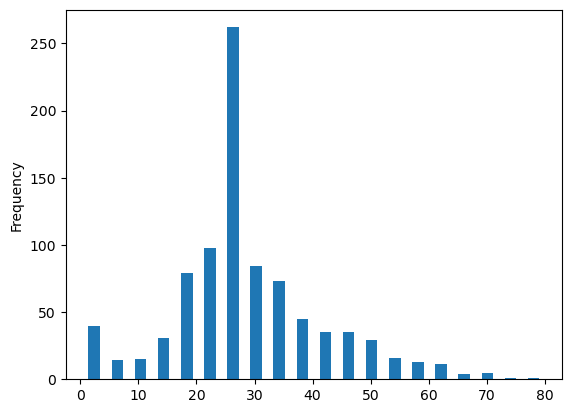

In [57]:
titanic_df['Age'].plot(kind='hist', bins=20, rwidth=0.5)

In [61]:
titanic_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [62]:
titanic_df['Cabin'].fillna('Unknown', inplace= True)

In [63]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Embarked 속성

In [67]:
titanic_df.Embarked

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

# 라벨 인코딩

In [69]:
titanic_df['Sex'].map({'male':0, 'female':1})

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [70]:
pd.get_dummies(titanic_df, columns=['Sex', 'Embarked']).head(1)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.25,Unknown,False,True,False,False,True


# 전처리 연습

In [3]:
import pandas as pd 

In [5]:
df= pd.read_csv('./data\CARD_SUBWAY_MONTH_202102.csv')
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
20210201,중앙선,용문,1282,1259,20210204,NaN
20210201,중앙선,지평,48,43,20210204,NaN
20210201,중앙선,아신,415,413,20210204,NaN
20210201,중앙선,양수,1463,1466,20210204,NaN
20210201,중앙선,운길산,495,463,20210204,NaN
...,...,...,...,...,...,...
20210228,중앙선,오빈,216,236,20210303,NaN
20210228,중앙선,양평,3299,3187,20210303,NaN
20210228,중앙선,원덕,322,304,20210303,NaN
20210228,중앙선,용문,1899,1716,20210303,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16751 entries, 20210201 to 20210228
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사용일자    16751 non-null  object 
 1   노선명     16751 non-null  object 
 2   역명      16751 non-null  int64  
 3   승차총승객수  16751 non-null  int64  
 4   하차총승객수  16751 non-null  int64  
 5   등록일자    0 non-null      float64
dtypes: float64(1), int64(3), object(2)
memory usage: 916.1+ KB


In [7]:
df.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
20210201,중앙선,용문,1282,1259,20210204,NaN
20210201,중앙선,지평,48,43,20210204,NaN
20210201,중앙선,아신,415,413,20210204,NaN
20210201,중앙선,양수,1463,1466,20210204,NaN
20210201,중앙선,운길산,495,463,20210204,NaN


In [8]:
df = df.reset_index()
df = df.dropna(axis=1, how="all")
# 또는
df = df.loc[:, ~df.columns.astype(str).str.contains("^Unnamed")]


In [9]:
df.head()

,index,사용일자,노선명,역명,승차총승객수,하차총승객수
0,20210201,중앙선,용문,1282,1259,20210204
1,20210201,중앙선,지평,48,43,20210204
2,20210201,중앙선,아신,415,413,20210204
3,20210201,중앙선,양수,1463,1466,20210204
4,20210201,중앙선,운길산,495,463,20210204


In [10]:
# 1) index를 컬럼으로 꺼내기
df = df.reset_index()

# 2) 컬럼을 올바른 의미로 재매핑
df = df.rename(columns={
    "index": "사용일자",
    "사용일자": "노선명",
    "노선명": "역명",
    "역명": "승차총승객수",
    "승차총승객수": "하차총승객수",
    "하차총승객수": "등록일자",
})

# 3) NaN만 있는 마지막 컬럼(원래 '등록일자'였던 애) 제거
df = df.dropna(axis=1, how="all")

# (선택) 타입 정리
df["승차총승객수"] = pd.to_numeric(df["승차총승객수"], errors="coerce")
df["하차총승객수"] = pd.to_numeric(df["하차총승객수"], errors="coerce")


In [11]:
df.head()

,level_0,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,0,20210201,중앙선,용문,1282,1259,20210204
1,1,20210201,중앙선,지평,48,43,20210204
2,2,20210201,중앙선,아신,415,413,20210204
3,3,20210201,중앙선,양수,1463,1466,20210204
4,4,20210201,중앙선,운길산,495,463,20210204


In [12]:
# level_0 지우기
df = df.drop(columns=['level_0'])
df.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20210201,중앙선,용문,1282,1259,20210204
1,20210201,중앙선,지평,48,43,20210204
2,20210201,중앙선,아신,415,413,20210204
3,20210201,중앙선,양수,1463,1466,20210204
4,20210201,중앙선,운길산,495,463,20210204


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16751 entries, 0 to 16750
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    16751 non-null  int64 
 1   노선명     16751 non-null  object
 2   역명      16751 non-null  object
 3   승차총승객수  16751 non-null  int64 
 4   하차총승객수  16751 non-null  int64 
 5   등록일자    16751 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 785.3+ KB


In [19]:
df.노선명.unique().shape

(25,)

In [21]:
df['노선명'].value_counts()

노선명
5호선         1484
7호선         1428
2호선         1400
경부선         1092
6호선         1051
분당선          967
3호선          937
경원선          821
경의선          737
4호선          728
9호선          700
중앙선          588
경인선          560
경춘선          532
수인선          504
8호선          476
공항철도 1호선     392
안산선          364
9호선2~3단계     364
우이신설선        364
경강선          308
일산선          282
1호선          280
과천선          224
장항선          168
Name: count, dtype: int64

In [24]:
df_line_cnt = df.groupby('노선명').size().reset_index()
df_line_cnt

,노선명,0
0,1호선,280
1,2호선,1400
2,3호선,937
3,4호선,728
4,5호선,1484
5,6호선,1051
6,7호선,1428
7,8호선,476
8,9호선,700
9,9호선2~3단계,364


In [25]:
import matplotlib.pyplot as plt

In [30]:
import warnings
warnings.filterwarnings('ignore')

#폰트 지정
from matplotlib import rcParams
rcParams['font.family'] = 'Gulim'
rcParams['axes.unicode_minus'] = False

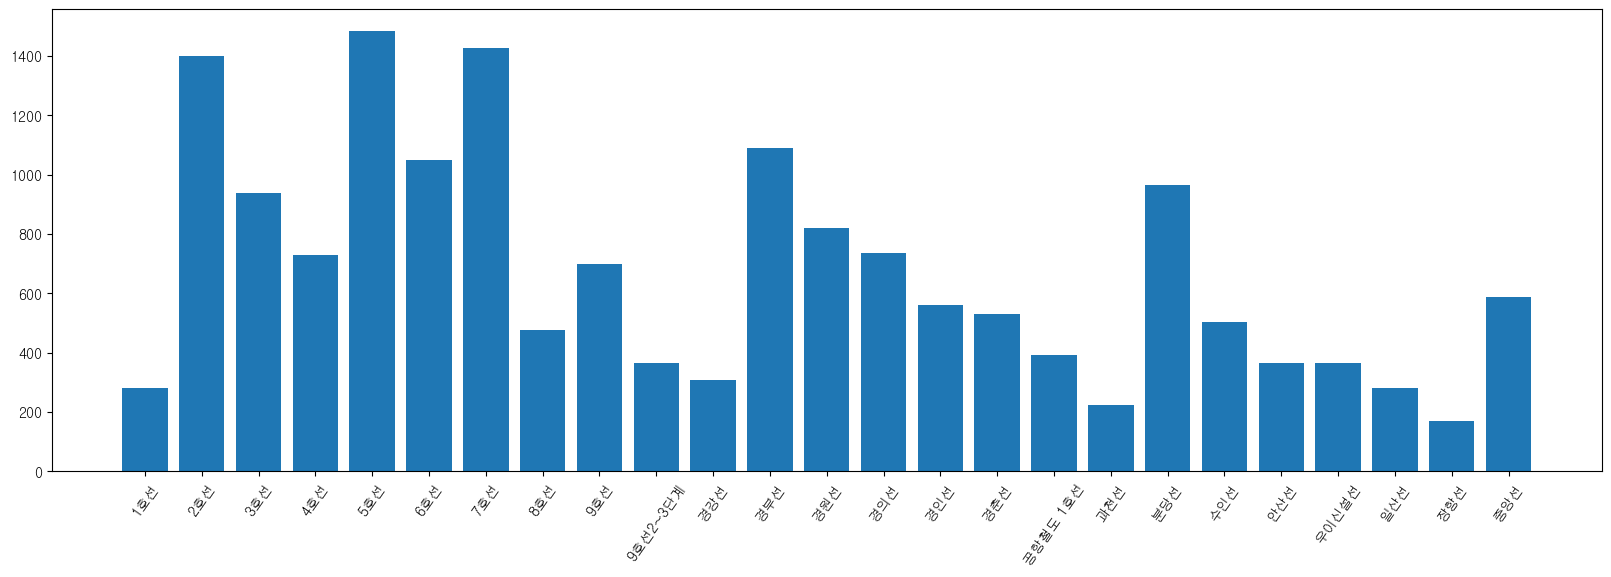

In [38]:
plt.figure(figsize=(20,6))
plt.bar(df_line_cnt['노선명'], df_line_cnt[0])
plt.xticks(rotation=55)
plt.show()

In [40]:
df_line_cnt = (
    df[df['노선명'] == '5호선']
    .groupby('역명')
    .size()
    .reset_index(name='cnt')
)

df_line_cnt


,역명,cnt
0,강동,28
1,개롱,28
2,개화산,28
3,거여,28
4,고덕,28
5,공덕,28
6,광나루(장신대),28
7,광화문(세종문화회관),28
8,군자(능동),28
9,굽은다리(강동구민회관앞),28


In [48]:
df[['승차총승객수', '하차총승객수']]


,승차총승객수,하차총승객수
0,1282,1259
1,48,43
2,415,413
3,1463,1466
4,495,463
...,...,...
16746,216,236
16747,3299,3187
16748,322,304
16749,1899,1716


In [49]:
df[['승차총승객수', '하차총승객수']].groupby(df['노선명']).sum().reset_index()

,노선명,승차총승객수,하차총승객수
0,1호선,4679191,4542729
1,2호선,28361914,28569248
2,3호선,10835360,10815356
3,4호선,10074811,10158195
4,5호선,13021347,12950928
5,6호선,6831414,6732553
6,7호선,14581263,14366013
7,8호선,3977672,4010501
8,9호선,5677271,5772797
9,9호선2~3단계,1906682,1876922


In [50]:
df_line_5 = df[df['노선명'] == '5호선']
df_line_5.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
419,20210201,5호선,하남풍산,4629,4624,20210204
420,20210201,5호선,미사,12743,12609,20210204
421,20210201,5호선,마천,5409,5566,20210204
422,20210201,5호선,거여,7499,7119,20210204
423,20210201,5호선,개롱,6040,6218,20210204


In [51]:
df_line_5.groupby('역명')[['승차총승객수', '하차총승객수']].sum().reset_index()

,역명,승차총승객수,하차총승객수
0,강동,417865,393081
1,개롱,137130,143689
2,개화산,114266,110775
3,거여,170214,163019
4,고덕,190570,189102
5,공덕,296871,314855
6,광나루(장신대),282257,259111
7,광화문(세종문화회관),630350,640269
8,군자(능동),242935,266776
9,굽은다리(강동구민회관앞),206037,195306


In [52]:
df_line_2 = df[df['노선명'] == '2호선']

In [55]:
df_line_2.groupby('역명')[['승차총승객수', '하차총승객수']].sum().reset_index()

,역명,승차총승객수,하차총승객수
0,강남,1830710,1782108
1,강변(동서울터미널),695308,689779
2,건대입구,757296,798583
3,교대(법원.검찰청),690275,769708
4,구로디지털단지,1285603,1287537
5,구의(광진구청),509864,507242
6,낙성대(강감찬),597804,580323
7,당산,393876,449450
8,대림(구로구청),546016,560634
9,도림천,30287,30993


In [60]:
df_line_5_승객수 = df_line_5.groupby('역명')[['승차총승객수', '하차총승객수']].sum().reset_index()
df_line_5_top_10 =df_line_5_승객수.sort_values(by='승차총승객수', ascending=False).head(10)
df_line_5_top_10_2 = df_line_5_승객수.sort_values(by='하차총승객수', ascending=False).head(10)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '광화문(세종문화회관)'),
  Text(1, 0, '까치산'),
  Text(2, 0, '화곡'),
  Text(3, 0, '여의도'),
  Text(4, 0, '오목교(목동운동장앞)'),
  Text(5, 0, '발산'),
  Text(6, 0, '천호(풍납토성)'),
  Text(7, 0, '목동'),
  Text(8, 0, '강동'),
  Text(9, 0, '장한평')])

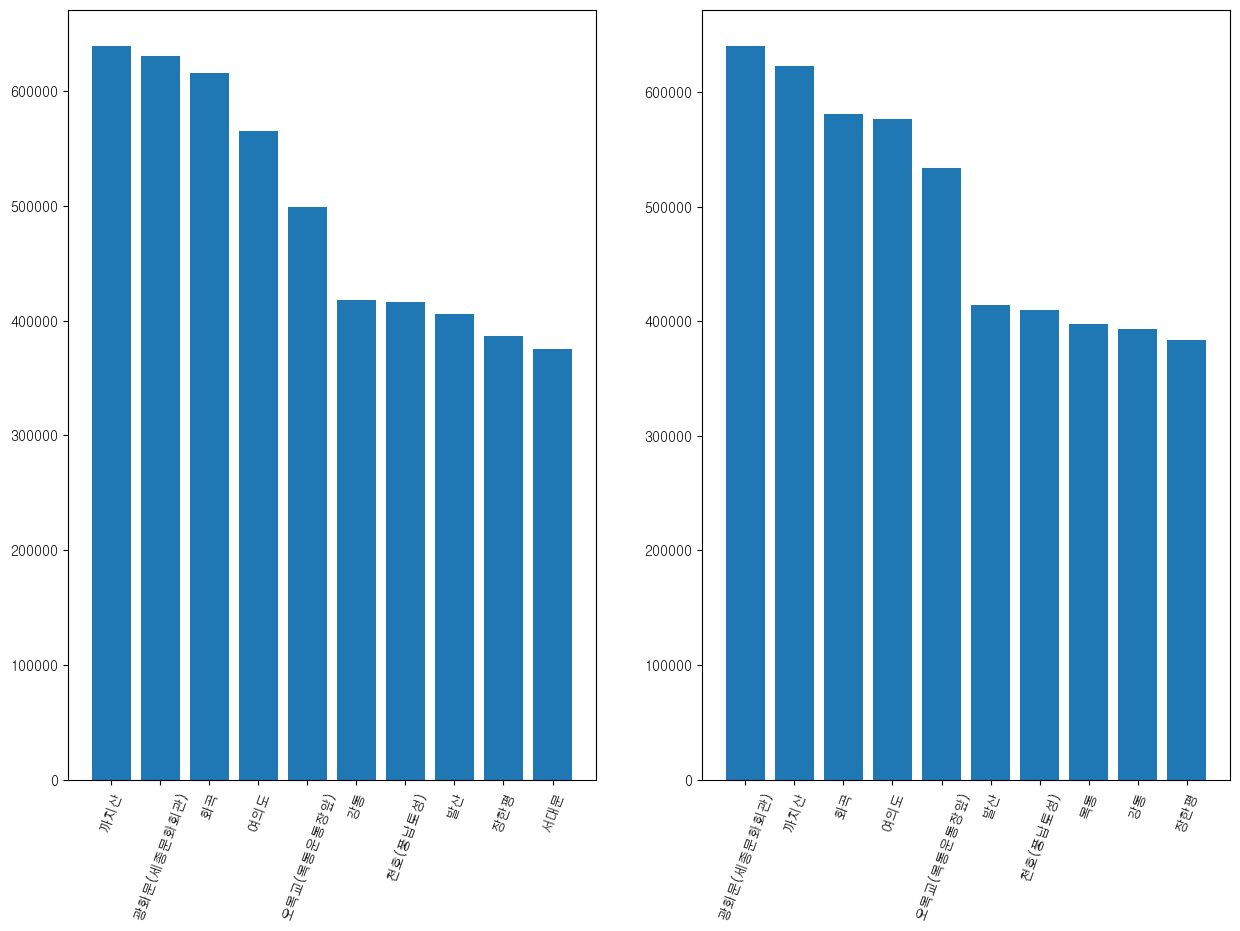

In [ ]:


plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
plt.bar(df_line_5_top_10['역명'], df_line_5_top_10['승차총승객수'])
plt.xticks(rotation=70)

plt.subplot(1, 2, 2)
plt.bar(df_line_5_top_10_2['역명'], df_line_5_top_10_2['하차총승객수'])
plt.xticks(rotation=70)

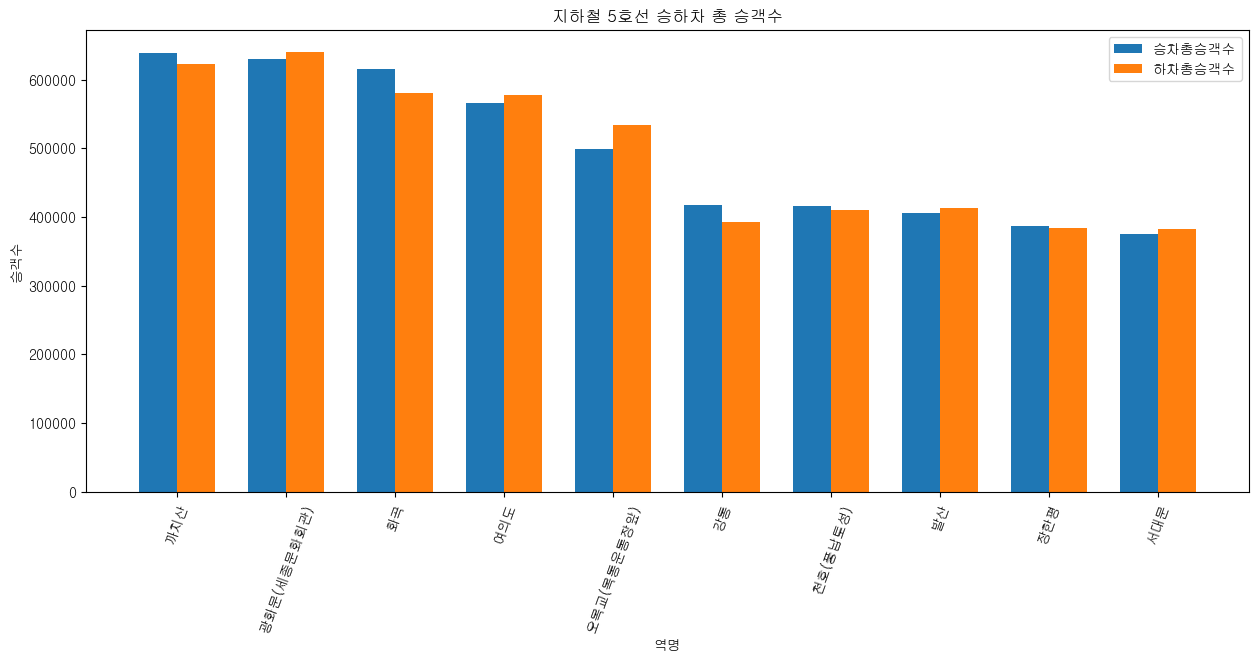

In [66]:
#이 두 차트를 합쳐서 하나의 바차트로 만들기
plt.figure(figsize=(15,6))
x = df_line_5_top_10['역명']
y1 = df_line_5_top_10['승차총승객수']
y2 = df_line_5_top_10['하차총승객수']

width = 0.35
x_pos = range(len(x))

plt.bar([i - width/2 for i in x_pos], y1, width, label='승차총승객수')
plt.bar([i + width/2 for i in x_pos], y2, width, label='하차총승객수')

plt.xlabel('역명')
plt.ylabel('승객수')
plt.title('지하철 5호선 승하차 총 승객수')
plt.xticks(x_pos, x, rotation=70)
plt.legend()
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '까치산'),
  Text(1, 0, '광화문(세종문화회관)'),
  Text(2, 0, '화곡'),
  Text(3, 0, '여의도'),
  Text(4, 0, '오목교(목동운동장앞)'),
  Text(5, 0, '강동'),
  Text(6, 0, '천호(풍납토성)'),
  Text(7, 0, '발산'),
  Text(8, 0, '장한평'),
  Text(9, 0, '서대문')])

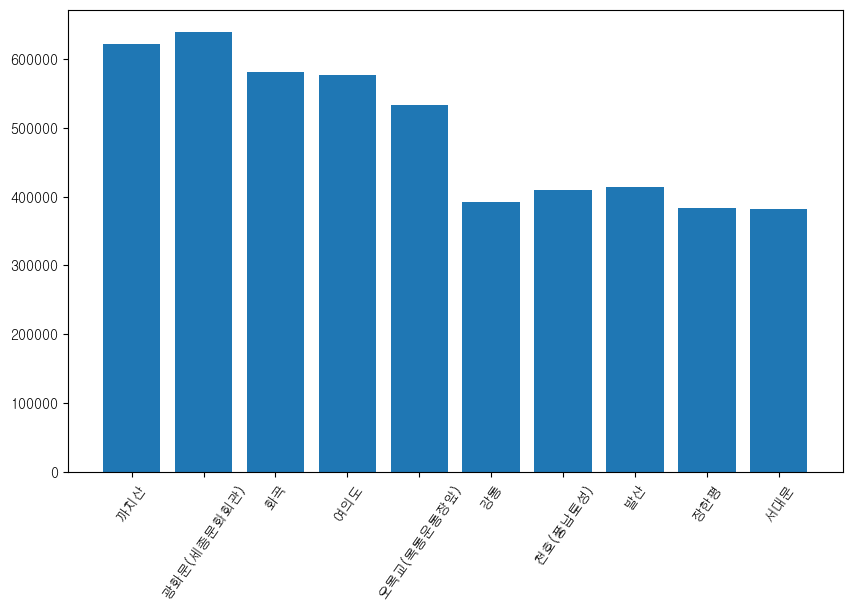

In [59]:
plt.figure(figsize=(10,6))
plt.bar(df_line_5_top_10['역명'], df_line_5_top_10['하차총승객수'])
plt.xticks(rotation=55)

In [67]:
df_new = df.drop(columns=['등록일자'], inplace=False)
df_new

,사용일자,노선명,역명,승차총승객수,하차총승객수
0,20210201,중앙선,용문,1282,1259
1,20210201,중앙선,지평,48,43
2,20210201,중앙선,아신,415,413
3,20210201,중앙선,양수,1463,1466
4,20210201,중앙선,운길산,495,463
...,...,...,...,...,...
16746,20210228,중앙선,오빈,216,236
16747,20210228,중앙선,양평,3299,3187
16748,20210228,중앙선,원덕,322,304
16749,20210228,중앙선,용문,1899,1716


In [68]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16751 entries, 0 to 16750
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    16751 non-null  int64 
 1   노선명     16751 non-null  object
 2   역명      16751 non-null  object
 3   승차총승객수  16751 non-null  int64 
 4   하차총승객수  16751 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 654.5+ KB


In [70]:
df_new['사용일자'] #2021-02-01 > datetype

0        20210201
1        20210201
2        20210201
3        20210201
4        20210201
           ...   
16746    20210228
16747    20210228
16748    20210228
16749    20210228
16750    20210228
Name: 사용일자, Length: 16751, dtype: int64

In [71]:
def changeDate(data):
    year = str(data)[0:4]
    month = str(data)[4:6]
    day = str(data)[6:8]
    return year + '-' + month + '-' + day

In [72]:
changeDate(20210201)

'2021-02-01'

In [77]:
df_new['사용일자'] = pd.to_datetime(df_new['사용일자1'])
df_new.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,사용일자1
0,2021-02-01,중앙선,용문,1282,1259,2021-02-01
1,2021-02-01,중앙선,지평,48,43,2021-02-01
2,2021-02-01,중앙선,아신,415,413,2021-02-01
3,2021-02-01,중앙선,양수,1463,1466,2021-02-01
4,2021-02-01,중앙선,운길산,495,463,2021-02-01


In [79]:
df_new = df_new.drop(columns=['사용일자1'])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16751 entries, 0 to 16750
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   사용일자    16751 non-null  datetime64[ns]
 1   노선명     16751 non-null  object        
 2   역명      16751 non-null  object        
 3   승차총승객수  16751 non-null  int64         
 4   하차총승객수  16751 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 654.5+ KB


In [80]:
승하차총승객수차이 = df_new['승차총승객수'] - df_new['하차총승객수']
df_new['승하차총승객수차이'] = 승하차총승객수차이

승하차총승객수 = df_new['승차총승객수'] + df_new['하차총승객수']
df_new['승하차총승객수'] = 승하차총승객수
df_new.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,승하차총승객수차이,승하차총승객수
0,2021-02-01,중앙선,용문,1282,1259,23,2541
1,2021-02-01,중앙선,지평,48,43,5,91
2,2021-02-01,중앙선,아신,415,413,2,828
3,2021-02-01,중앙선,양수,1463,1466,-3,2929
4,2021-02-01,중앙선,운길산,495,463,32,958


In [82]:
df_new[df_new['노선명'] == '2호선']

,사용일자,노선명,역명,승차총승객수,하차총승객수,승하차총승객수차이,승하차총승객수
532,2021-02-01,2호선,용두(동대문구청),2365,2430,-65,4795
533,2021-02-01,2호선,신정네거리,9269,9599,-330,18868
534,2021-02-01,2호선,양천구청,6318,6738,-420,13056
535,2021-02-01,2호선,도림천,1434,1469,-35,2903
536,2021-02-01,2호선,신설동,3046,3110,-64,6156
...,...,...,...,...,...,...,...
16207,2021-02-28,2호선,신설동,2806,2830,-24,5636
16208,2021-02-28,2호선,도림천,480,477,3,957
16209,2021-02-28,2호선,양천구청,3234,3281,-47,6515
16210,2021-02-28,2호선,신정네거리,4814,4805,9,9619


In [86]:
df_new[df_new['노선명'] == '2호선'].groupby('역명')[['승하차총승객수차이','승하차총승객수']].sum().reset_index()

,역명,승하차총승객수차이,승하차총승객수
0,강남,48602,3612818
1,강변(동서울터미널),5529,1385087
2,건대입구,-41287,1555879
3,교대(법원.검찰청),-79433,1459983
4,구로디지털단지,-1934,2573140
5,구의(광진구청),2622,1017106
6,낙성대(강감찬),17481,1178127
7,당산,-55574,843326
8,대림(구로구청),-14618,1106650
9,도림천,-706,61280


In [88]:
#상위 10개 역 추출 (승하차총승객수)
df_2호선 = df_new[df_new['노선명'] == '2호선']
top_10_stations = df_2호선.groupby('역명')[['승하차총승객수']].sum().sort_values(by='승하차총승객수', ascending=False).head(10)
top_10_stations.reset_index()

,역명,승하차총승객수
0,강남,3612818
1,잠실(송파구청),2959718
2,신림,2776742
3,구로디지털단지,2573140
4,홍대입구,2540954
5,신도림,2138194
6,선릉,2091430
7,역삼,2076344
8,서울대입구(관악구청),2075523
9,삼성(무역센터),2072738


In [89]:
#상위 10개 역 추출 (승하차총승객수차이)
top_10_stations_diff = df_2호선.groupby('역명')[['승하차총승객수차이']].sum().sort_values(by='승하차총승객수차이', ascending=False).head(10)
top_10_stations_diff.reset_index()

,역명,승하차총승객수차이
0,선릉,120930
1,왕십리(성동구청),51830
2,강남,48602
3,신림,33048
4,봉천,31026
5,잠실(송파구청),26942
6,시청,26440
7,신도림,25478
8,서울대입구(관악구청),18565
9,낙성대(강감찬),17481


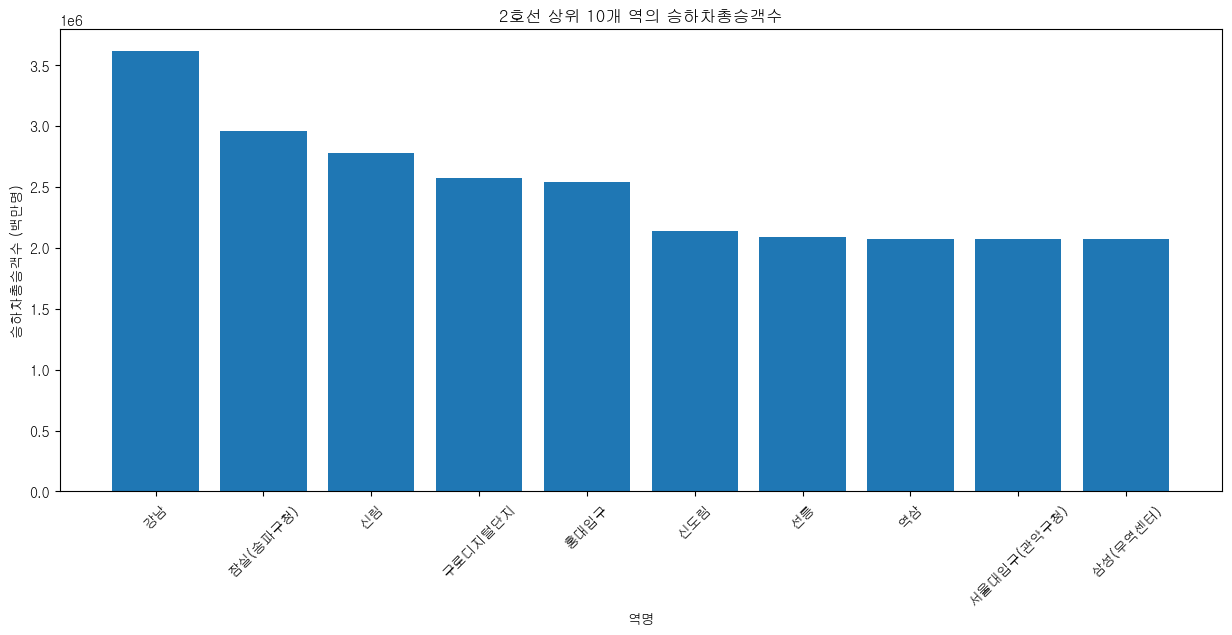

In [91]:
#막대 차트 그리기
plt.figure(figsize=(15,6))
x = top_10_stations.index
y = top_10_stations['승하차총승객수']
plt.bar(x, y)
plt.xlabel('역명')
plt.ylabel('승하차총승객수 (백만명)')
plt.title('2호선 상위 10개 역의 승하차총승객수')
plt.xticks(rotation=45)
plt.show()

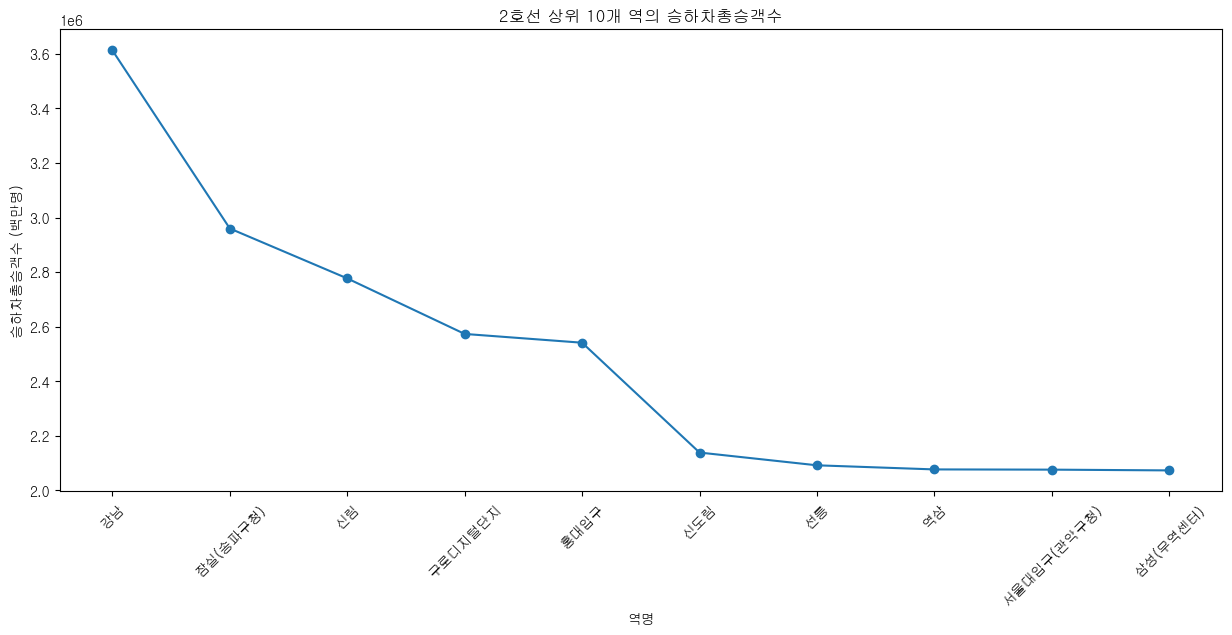

In [92]:
#라인차트 그리기
plt.figure(figsize=(15,6))
plt.plot(top_10_stations.index, top_10_stations['승하차총승객수'], marker='o')
plt.xlabel('역명')
plt.ylabel('승하차총승객수 (백만명)')
plt.title('2호선 상위 10개 역의 승하차총승객수')
plt.xticks(rotation=45)
plt.show()

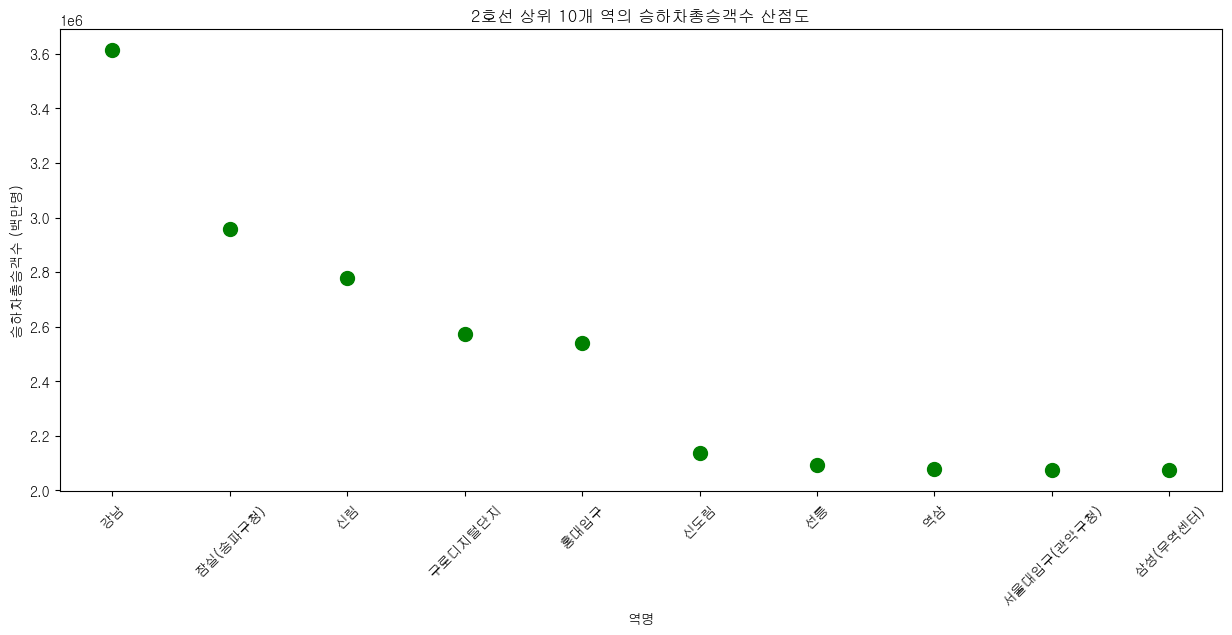

In [93]:
#산점도 그래프 그리기
plt.figure(figsize=(15,6))
plt.scatter(top_10_stations.index, top_10_stations['승하차총승객수'], color='green', s=100)
plt.xlabel('역명')
plt.ylabel('승하차총승객수 (백만명)')
plt.title('2호선 상위 10개 역의 승하차총승객수 산점도')
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, '승하차총승객수 (백만명)')

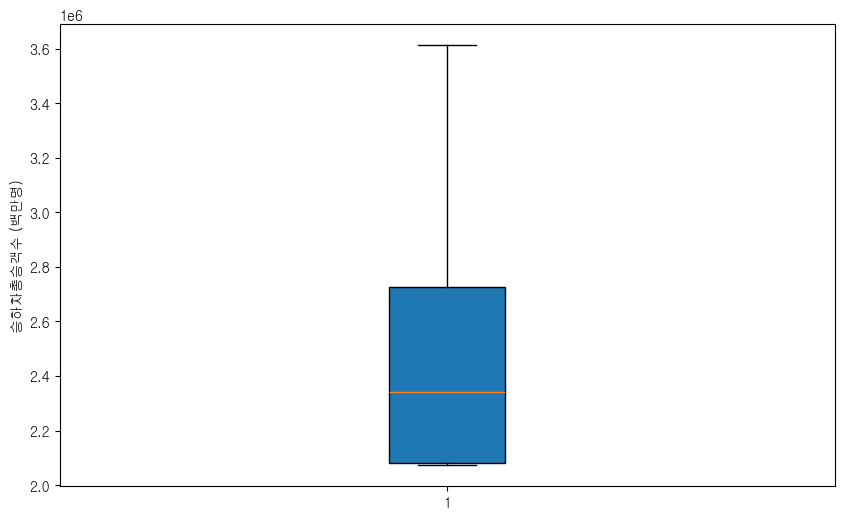

In [94]:
#박스플롯 그리기
plt.figure(figsize=(10,6))
plt.boxplot(top_10_stations['승하차총승객수'], vert=True, patch_artist=True)
plt.ylabel('승하차총승객수 (백만명)')

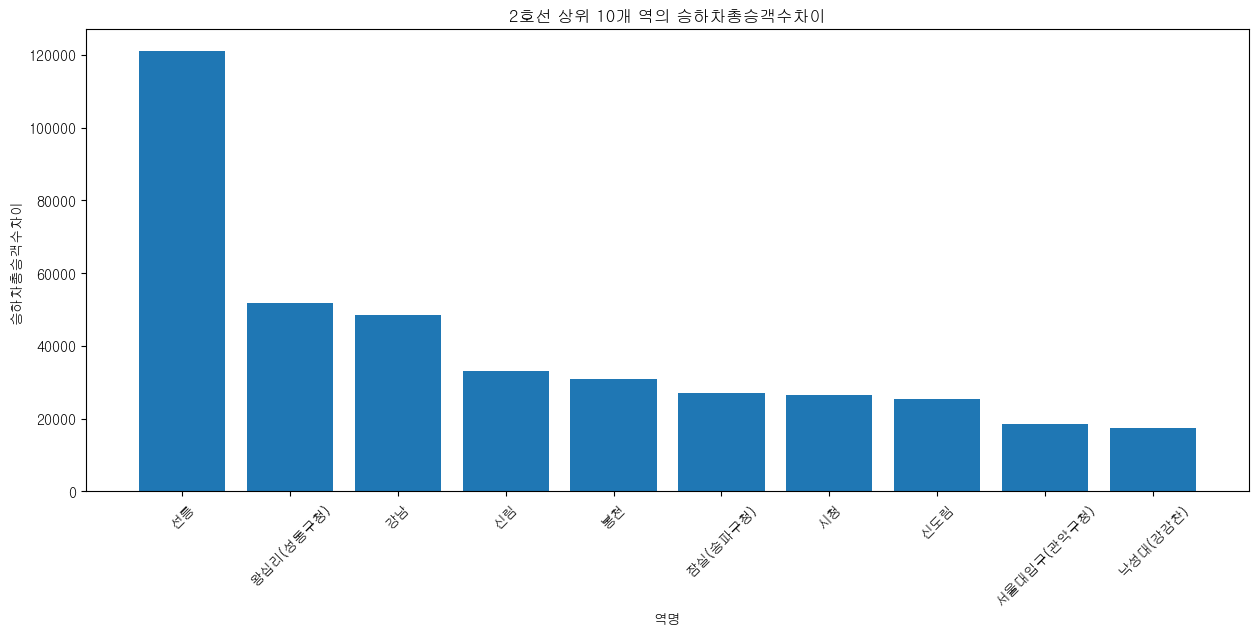

In [96]:
#막대 그래프 그리기 (승하차총승객수차이)
plt.figure(figsize=(15,6))
x = top_10_stations_diff.index
y = top_10_stations_diff['승하차총승객수차이']
plt.bar(x, y)
plt.xlabel('역명')
plt.ylabel('승하차총승객수차이')
plt.title('2호선 상위 10개 역의 승하차총승객수차이')
plt.xticks(rotation=45)
plt.show()

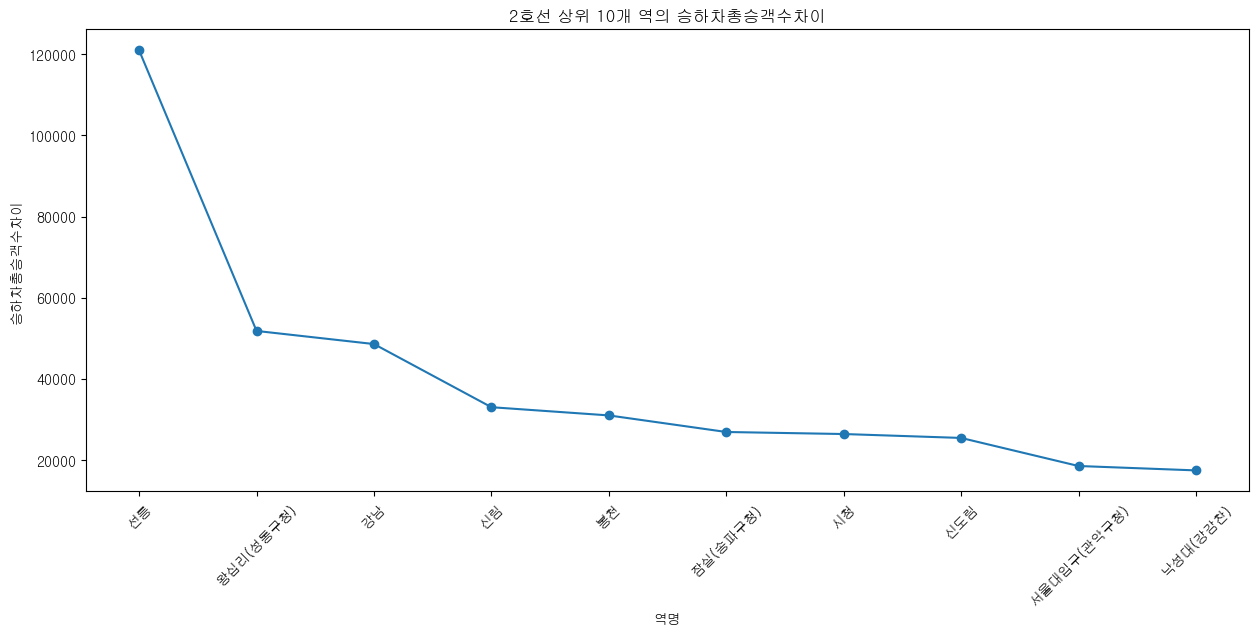

In [97]:
# 라인차트 그리기 (승하차총승객수차이)
plt.figure(figsize=(15,6))
plt.plot(top_10_stations_diff.index, top_10_stations_diff['승하차총승객수차이'], marker='o')
plt.xlabel('역명')
plt.ylabel('승하차총승객수차이')
plt.title('2호선 상위 10개 역의 승하차총승객수차이')
plt.xticks(rotation=45)
plt.show() 

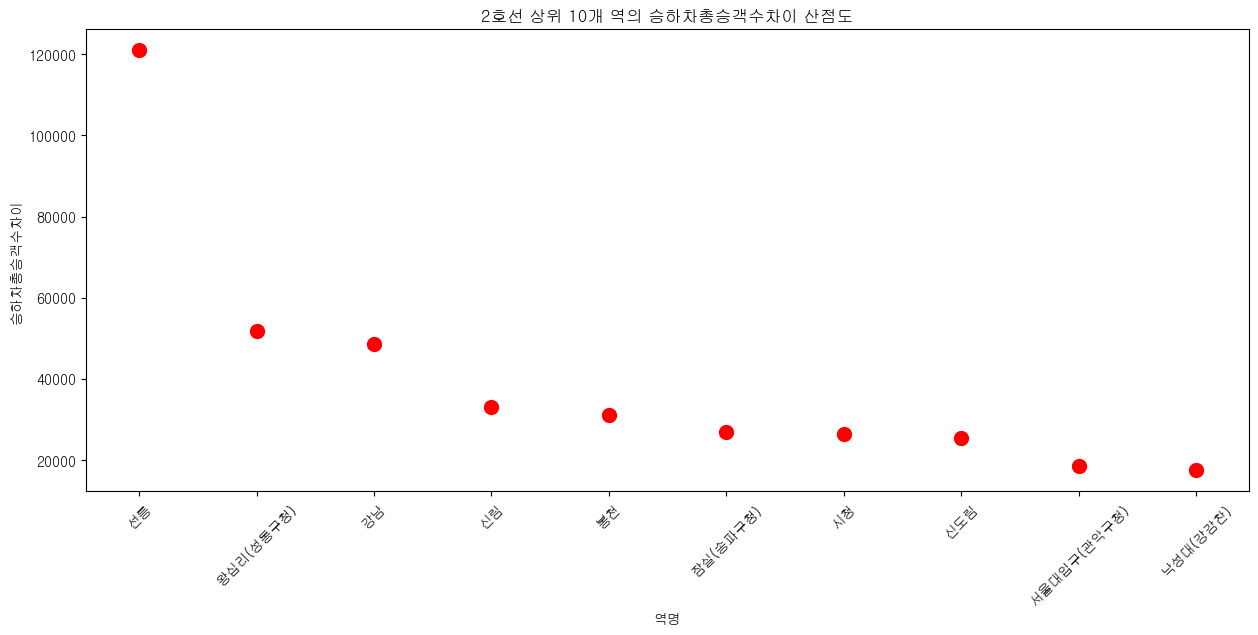

In [98]:
# 산점도 그래프 그리기 (승하차총승객수차이)
plt.figure(figsize=(15,6))
plt.scatter(top_10_stations_diff.index, top_10_stations_diff['승하차총승객수차이'], color='red', s=100)
plt.xlabel('역명')
plt.ylabel('승하차총승객수차이')
plt.title('2호선 상위 10개 역의 승하차총승객수차이 산점도')
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, '승하차총승객수차이')

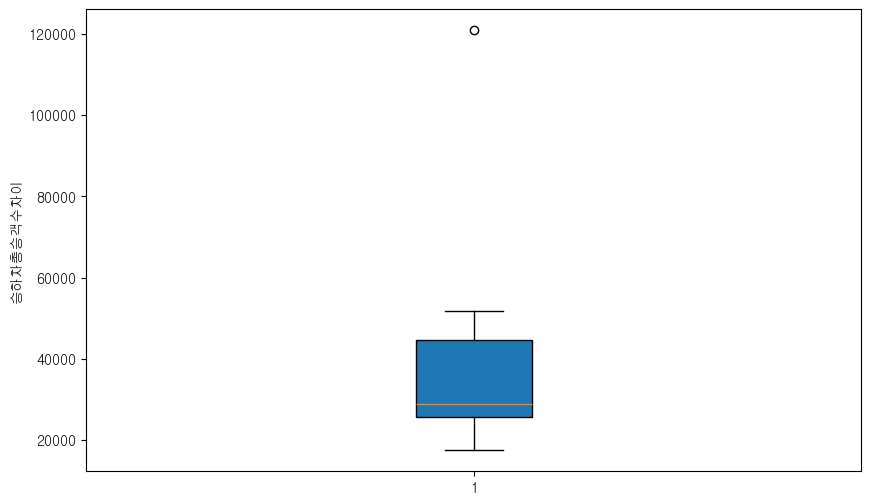

In [99]:
# 박스플롯 그리기(승하차총승객수차이)
plt.figure(figsize=(10,6))
plt.boxplot(top_10_stations_diff['승하차총승객수차이'], vert=True, patch_artist=True)
plt.ylabel('승하차총승객수차이')